Thanks to the tables available at https://dbkpop.com, we are able to assemble a decent amount of information about idols and groups out of South Korea recently. We've cleaned data from a full idol list as well as a list each for boy bands and girl groups, and merged them into a single .csv file to work with and explore. Using this data, we'd like to examine four questions:
1. Which nations besides South korea produce the most idols?
2. Within South Korea, where do most idols come from?
3. Has the number of foreign idols grown over time as K-pop has expanded its reach and popularity?
4. Given concern about idols debuting at younger ages, can we confirm if the median age of debut is declining?

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 0)
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import geopandas
from geopandas import read_file
from pywaffle import Waffle

data_raw = pd.read_csv(r'C:\Users\lb\Desktop\jupyter_work\kpop_merged.csv')
data1 = data_raw.copy(deep=True)
data1.head()

,Gender,Stage Name,Full Name,Date of Birth,Group,Country,Second Country,Birthplace,Other Group,Former Group,Position,SK_Province,Short,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Female,A-ra,Choi Eunji,2003-07-25,Girls' World,South Korea,NaN,Seoul,NaN,NaN,NaN,Seoul,NaN,2022-06-20,Liz,4,4,Sweipi,Yes
1,Female,Aeji,Kwon Aeji,1999-10-25,Hashtag,South Korea,NaN,Daegu,NaN,NaN,NaN,Daegu,Hashtag,2017-10-11,LUK,7,7,NaN,Yes
2,Female,AhIn,Lee Ahin,1999-09-27,MOMOLAND,South Korea,NaN,Wonju,NaN,NaN,NaN,Gangwon-do,NaN,2016-11-09,Double Kick,6,7,NaN,Yes
3,Female,Ahra,Go Ahra,2001-02-21,Favorite,South Korea,NaN,Yeosu,NaN,NaN,NaN,Jeollanam-do,NaN,2017-07-05,Astory,6,6,NaN,Yes
4,Female,Ahyeon,Jung Ahyeon,2007-04-11,BABYMONSTER,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-27,YG,7,7,NaN,Yes


In [2]:
new_country = pd.concat([data1['Country'], data1['Second Country']]).value_counts()
new_country.drop(index='South Korea', inplace=True)
print(new_country)

Japan          78
China          55
USA            44
Thailand       15
Taiwan         12
Canada         11
Australia      10
Hong Kong       8
Philippines     4
Indonesia       3
Vietnam         3
Germany         2
Argentina       2
Brazil          2
India           2
Italia          1
Russia          1
Belgium         1
Malaysia        1
New Zealand     1
Macau           1
Senegal         1
Romania         1
Fiji            1
Name: count, dtype: int64


Text(0.5, 1.0, 'Idols Produced by Nationality')

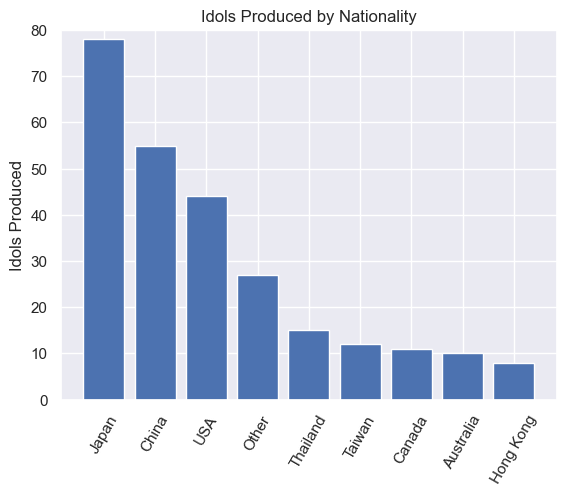

In [3]:
other = new_country[new_country<5]
other_sum = other.sum()

add_other = {'Other': other_sum}
s = pd.Series(data=add_other, index=['Other'])

new_country.drop(labels=other.index, inplace=True)
new_country = pd.concat([new_country, s])
new_country.sort_values(ascending=False, inplace=True)

figure, new_bar = plt.subplots()
plt.xticks(rotation=60)

new_bar.bar(new_country.index, new_country)
new_bar.set_ylim([0, 80])
new_bar.set_ylabel('Idols Produced')
new_bar.set_title('Idols Produced by Nationality')

<function matplotlib.pyplot.show(close=None, block=None)>

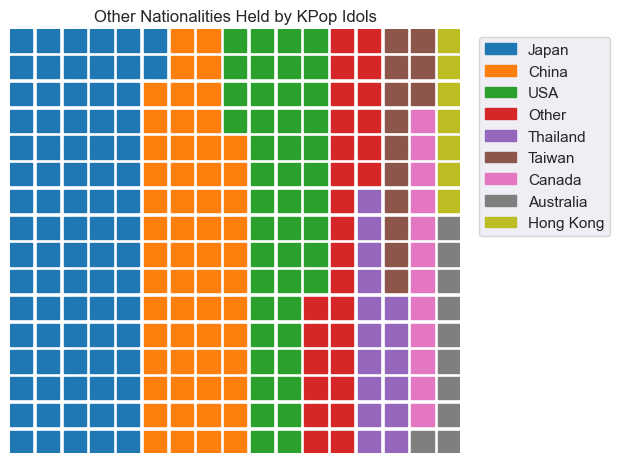

In [4]:
plt.figure(
    FigureClass=Waffle,
    rows=16,
    columns=17,
    values=new_country,
    cmap_name='tab10',
    block_arranging_style='snake',
    title={'label': 'Other Nationalities Held by KPop Idols'},
    labels=new_country.index.to_list(),
    legend={'loc': 1, 'bbox_to_anchor': (1.35,1)}
)
plt.show

Unsurprisingly, a large portion of foreign idols come from South Korea's neighbors China and Japan. (Hong Kong and Taiwan's numbers are split out from China's, and a single idol from Macau is under the Other umbrella.) Per the World Bank[1], China is South Korea's largest trading partner and Japan is fourth. Japan also has its own J-pop, which has been in conversation with K-pop[2] since either have existed. Anyone familiar with the K-pop industry will know that popular groups regularly put out Japanese language songs, both originals and translated versions of Korean language counterparts.

We can also see the U.S. producing the third most idols, which is neat. The U.S. is South Korea's second largest trading partner, and K-pop has been gaining traction here[3], especially since Blackpink played Coachella in 2019. Korean music of all kinds has also been heavily influenced by American music since American troops were brought there at the end of WWII, and again during the Korean War.

We should next consider our second question, which is where Korean idols come from within the country itself.

SK_Province
Seoul Metro City              239
Gyeonggi Province             140
Busan Metro City               70
Incheon Metro City             47
Gwangju Metro City             42
Daegu Metro City               36
South Gyeongsang Province      34
North Jeolla Province          23
South Jeolla Province          22
North Gyeongsang Province      20
Daejeon Metro City             19
Gangwon Province               18
North Chungcheong Province     17
South Chungcheong Province     10
Ulsan Metro City                6
Jeju                            1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

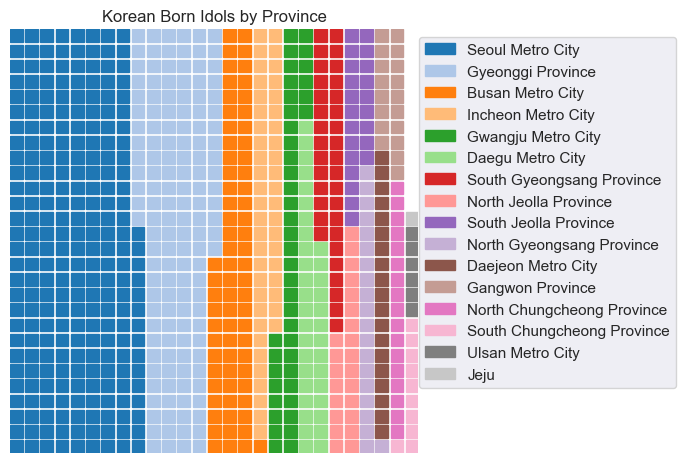

In [5]:
province = data1['SK_Province'].copy()

cities = ['Seoul', 'Busan', 'Incheon', 'Gwangju', 'Daegu', 'Ulsan', 'Daejeon']

korean = ['Gyeonggi-do', 'Gyeongsangnam-do', 'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gangwon-do', 'Chungcheongbuk-do',
          'Chungcheongnam-do']

romanization = ['Gyeonggi', 'South Gyeongsang', 'North Jeolla', 'South Jeolla', 'North Gyeongsang', 'Gangwon', 'North Chungcheong',
               'South Chungcheong']

for city in cities:
    province.replace(to_replace=city, value=city + ' Metro City', inplace=True)
for k, r in zip(korean, romanization):
    province.replace(to_replace=k, value=r + ' Province', inplace=True)

province = province.value_counts()
print(province)

plt.figure(
    FigureClass=Waffle,
    rows=28,
    values=province,
    cmap_name='tab20',
    block_arranging_style='snake',
    title={'label': 'Korean Born Idols by Province'},
    labels=province.index.to_list(),
    legend={'loc': 1, 'bbox_to_anchor': (1.65,1)}
)
plt.show

It looks like about a third of Korean idols come from Seoul, and another 18.8% come from Gyeonggi Province, the area surrounding Seoul.

These numbers are very large, but they are worth contextualizing: Seoul is the most populous city in South Korea with about 9.6m people, and Gyeonggi Province is the most populous province, with a population of about 13.5m. (We should also point out that Seoul is a distinct political organization from Gyeonggi Province; this is not the same as double counting people from New York City when considering the population of New York State.) The population of South Korea is just over 52m, meaning that about 44.4% of the country's population lives in these two regions.

For further context, the combined population of the United States's most populous state (California) and city (New York City) represent about 13.7% of the country's population.

It's actually remarkable that more idols do not come from Seoul and the area immediately surrounding it.

In addition to the waffle plot above, we can see this represented on a map of South Korea below:

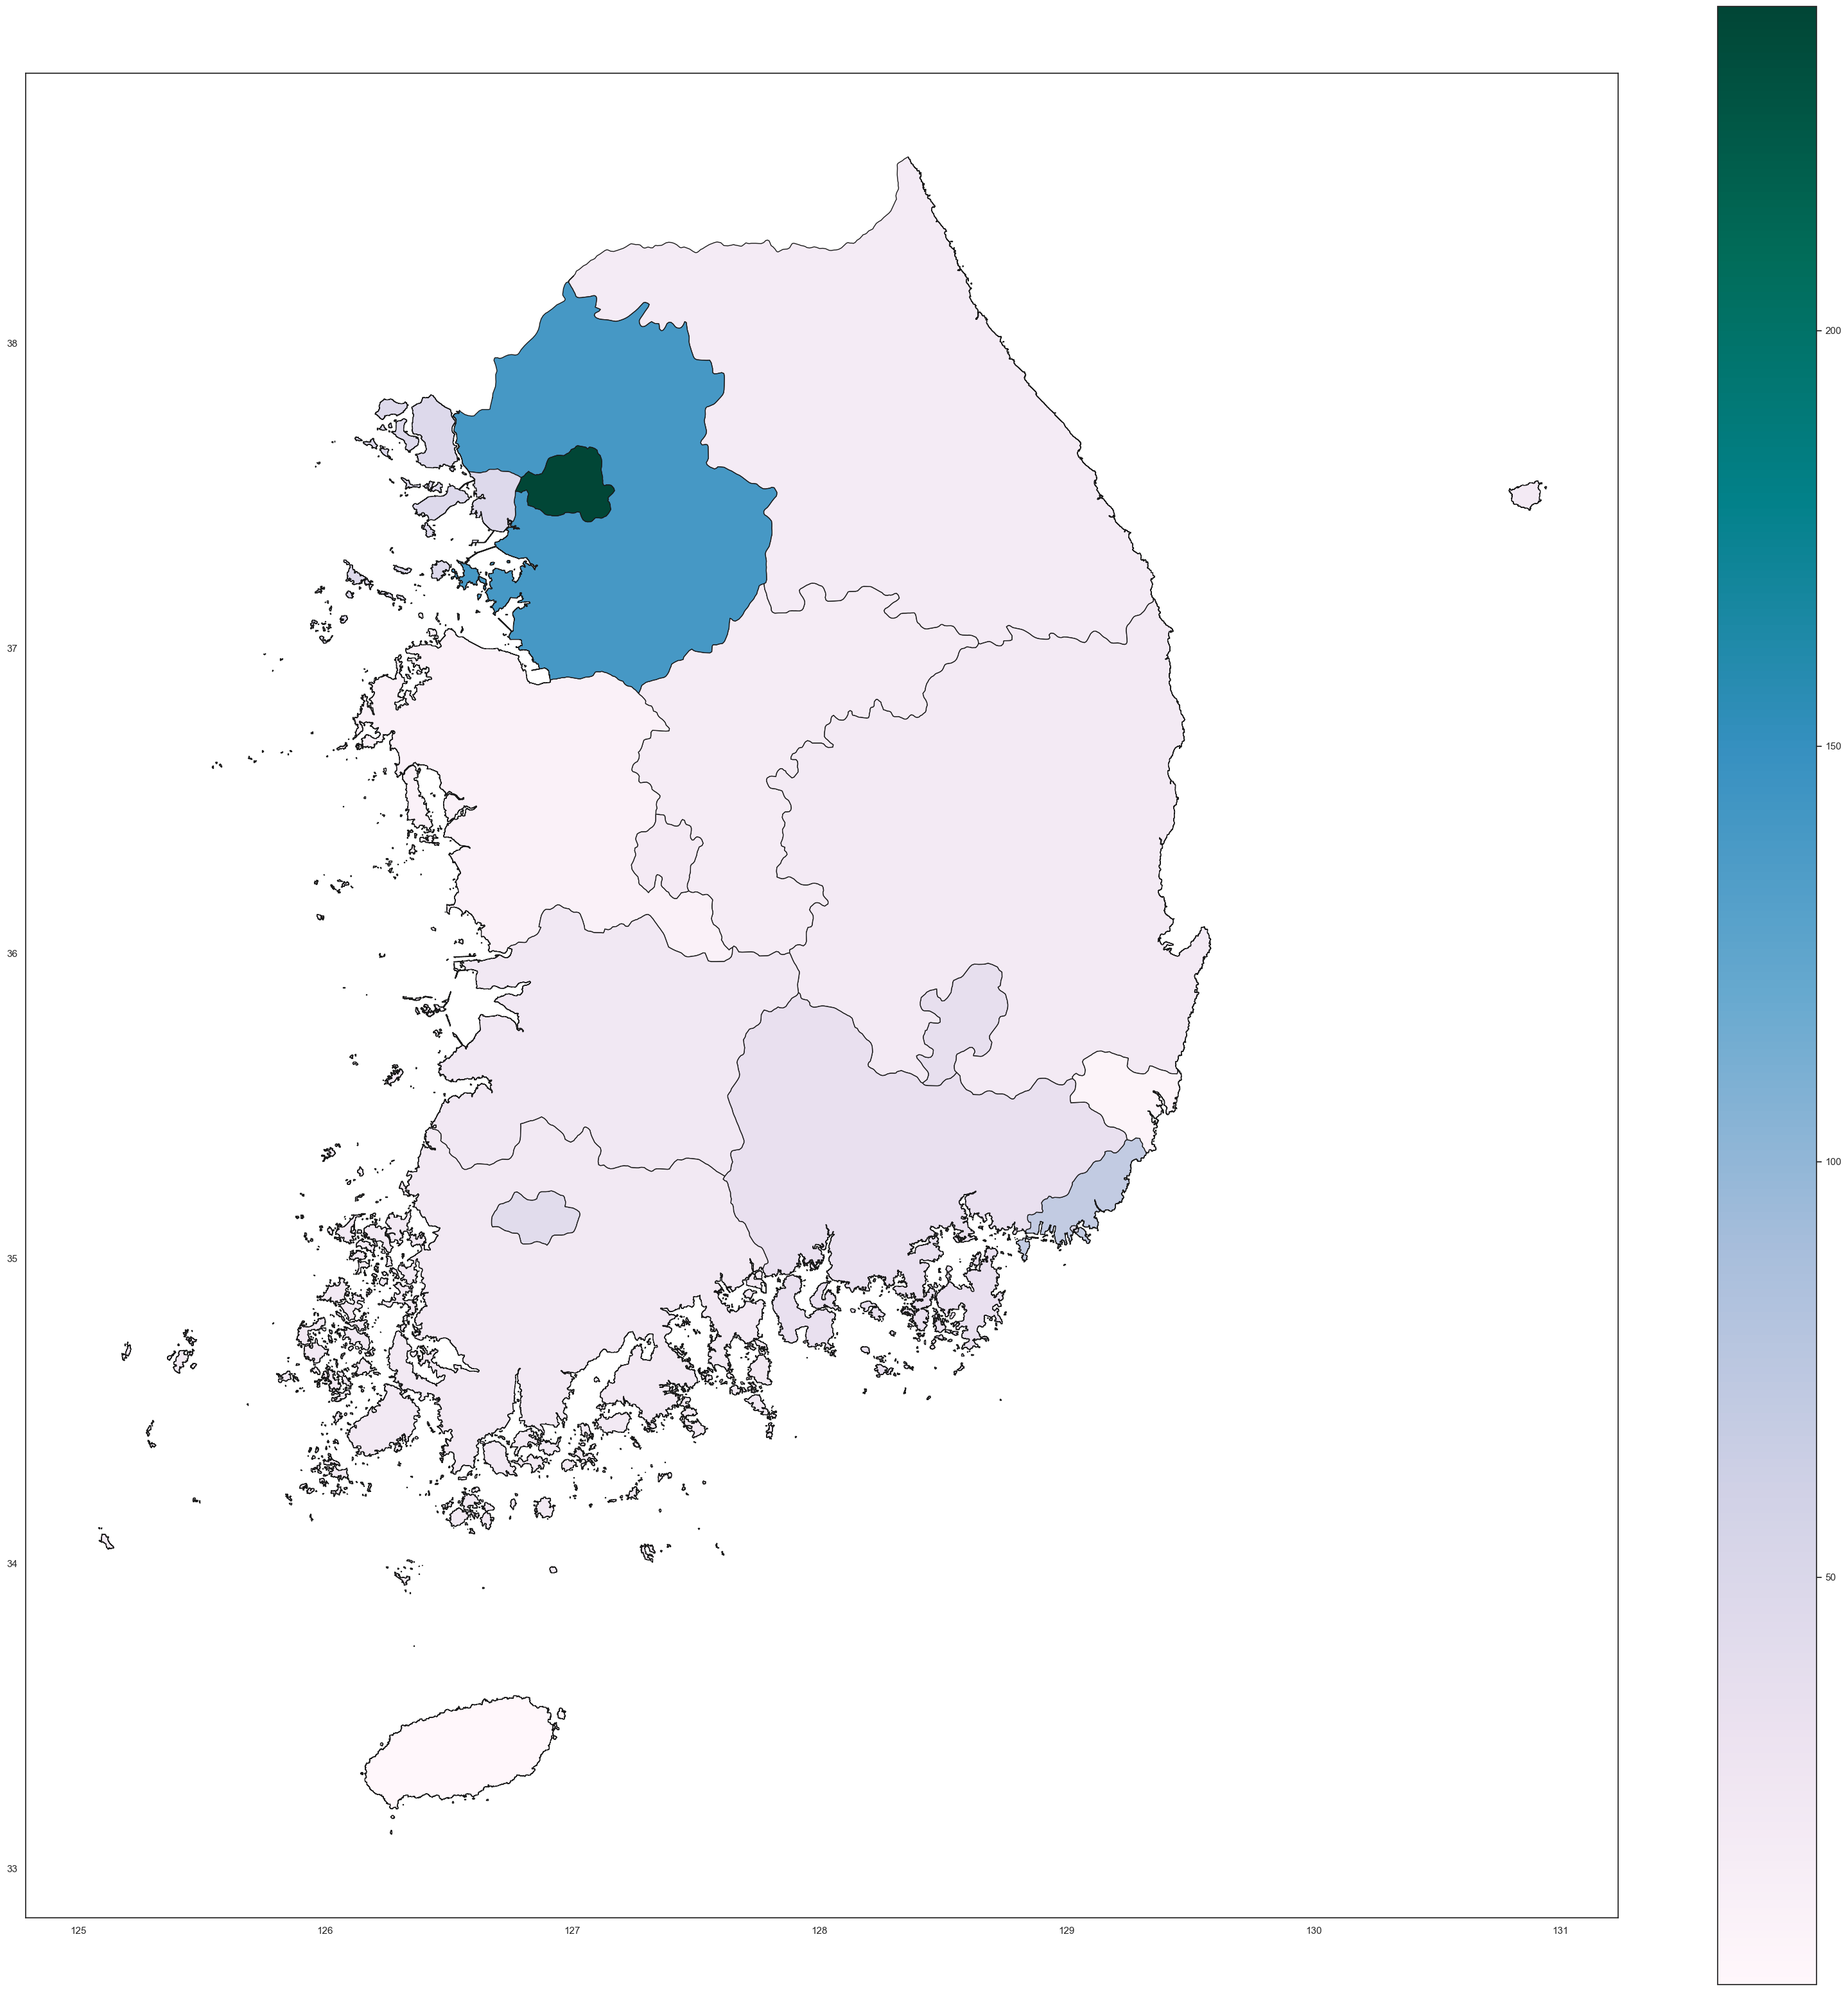

In [6]:
sns.set_theme(style='white')
sk_map = geopandas.read_file('sk_province_map.geojson')
sk_map.set_index('NAME_1', inplace=True)
counts = data1['SK_Province'].value_counts()
viz = pd.merge(sk_map, counts, how='left', left_index=True, right_index=True)

ax = viz.plot(
    'count',
    cmap='PuBuGn',
    legend=True,
    figsize=(40,40),
    edgecolor= 'k'
)

Let's now consider if the number of foreign idols has changed over time. K-pop has become more internationally known in the last decade, so we might expect 1) more foriegn auditioners, trainees, and by extension idols; and 2) for K-pop companies to actively recruit foreign idols to help increase market reach.

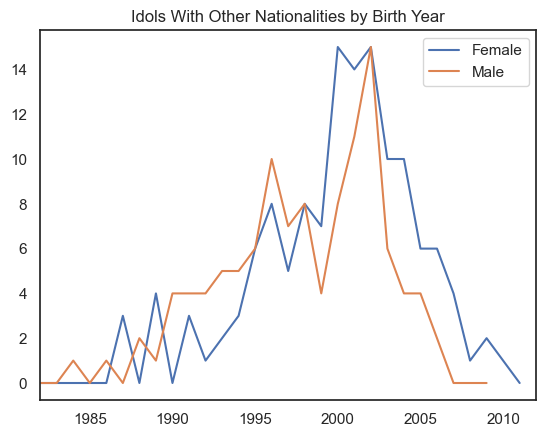

In [7]:
columns = ['Gender', 'Date of Birth', 'Country', 'Second Country', 'Debut', 'Orig. Memb.', 'Group']
birthplace_questions = data1[columns].copy()

def sk_natl(row):
    if row['Country'] == 'South Korea' or row['Second Country'] == 'South Korea':
        return True

def other_natl(row):
    if row['Country'] != 'South Korea' or (row['Second Country'] != 'South Korea' and not pd.isna(row['Second Country'])):
        return True

birthplace_questions['Birth_Year'] = pd.DatetimeIndex(birthplace_questions['Date of Birth']).year
birthplace_questions['Debut_Year'] = pd.DatetimeIndex(birthplace_questions['Debut']).year
birthplace_questions['SK_Natl'] = birthplace_questions.apply(sk_natl, axis=1)
birthplace_questions['Other_Natl'] = birthplace_questions.apply(other_natl, axis=1)

to_graph = pd.pivot_table(birthplace_questions, values=['Other_Natl'], index='Birth_Year', columns=['Gender'], aggfunc='count')

figure, new_line = plt.subplots()
sns.set_theme(style='ticks')

plt.plot(to_graph.index, to_graph['Other_Natl']['Female'], label='Female')
plt.plot(to_graph.index, to_graph['Other_Natl']['Male'], label='Male')
plt.title('Idols With Other Nationalities by Birth Year')
new_line.set_xlim([1982, 2012])
plt.legend()
plt.show()

We can see that foriegn idols peak by birthday in the early 2000s. However, this should not surprise us: This data was collected in 2024 and someone born in 2004 would be 20 this year. That is, we might not be seeing a decline in debuts by foreign idols after 2003 or 2004, so much as a decline in debuts by all idols born after 2003 or 2004, simply because they are still trainees.

Let's instead consider foreign idols by date of debut.

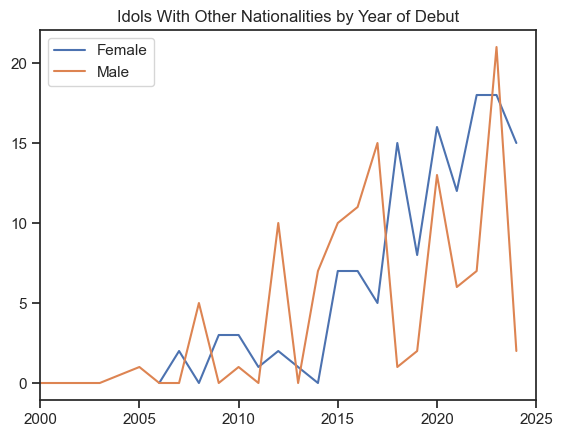

In [8]:
to_graph = pd.pivot_table(birthplace_questions, values=['Other_Natl'], index='Debut_Year', columns=['Gender'], aggfunc='count')

figure, new_line = plt.subplots()

plt.plot(to_graph.index, to_graph['Other_Natl']['Female'], label='Female')
plt.plot(to_graph.index, to_graph['Other_Natl']['Male'], label='Male')
plt.title('Idols With Other Nationalities by Year of Debut')
new_line.set_xlim([2000, 2025])
plt.legend()
plt.show()

Here we can see fairly clearly that the general trend of female foreign idols is increasing, while the number of foriegn male idols changes more radically in each direction each year.

In [9]:
columns = ['Group', 'Orig. Memb.', 'Debut_Year']
to_graph = birthplace_questions[columns].copy()
to_graph.set_index('Group', inplace=True)
to_graph = to_graph[pd.notnull(to_graph.index)]
to_graph['Foreign_Memb.'] = pd.Series(dtype='int')

for group in to_graph.index:
    dummy = birthplace_questions.loc[birthplace_questions.Group == group]
    to_graph.loc[group, 'Foreign_Memb.'] = sum(dummy.Other_Natl == True)

to_graph.drop_duplicates(inplace=True)
big = ['tripleS', 'NCT']
to_graph.drop(index=big, inplace=True)
to_graph.sort_values('Foreign_Memb.', inplace=True)

[Text(0.5, 1.0, 'Foreign Members Out of Original Members')]

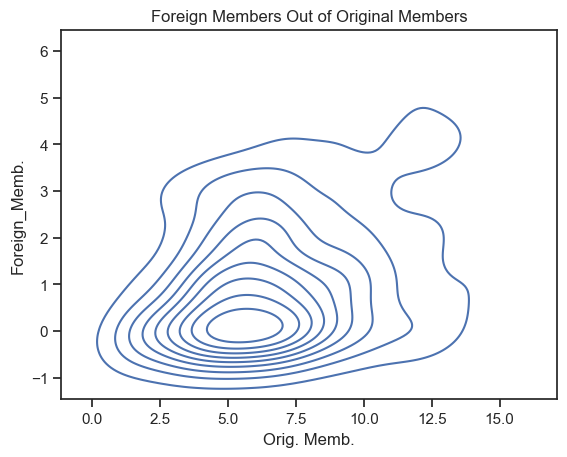

In [54]:
pre_2015 = to_graph.loc[to_graph['Debut_Year'] <2015]
since_2015 = to_graph.loc[to_graph['Debut_Year'] >= 2015]

sns.kdeplot(data=to_graph, x='Orig. Memb.', y='Foreign_Memb.').set(title='Foreign Members Out of Original Members')

[Text(0.5, 1.0, 'Foreign Members Out of Original Members of Groups That Debuted Before 2015')]

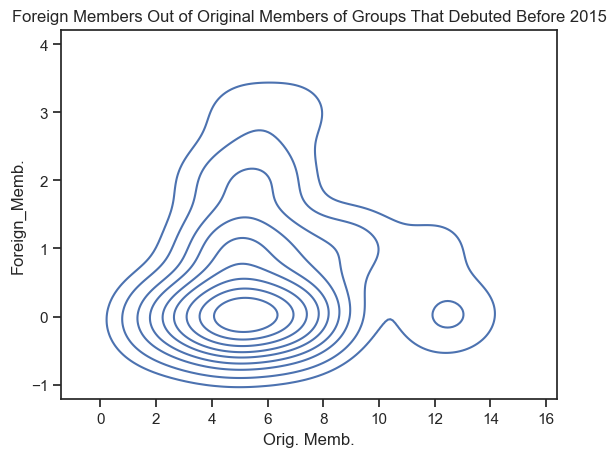

In [55]:
sns.kdeplot(data=pre_2015, x='Orig. Memb.', y='Foreign_Memb.').set(title='Foreign Members Out of Original Members of Groups That Debuted Before 2015')

[Text(0.5, 1.0, 'Foreign Members Out of Original Members of Groups That Debuted In or Since 2015')]

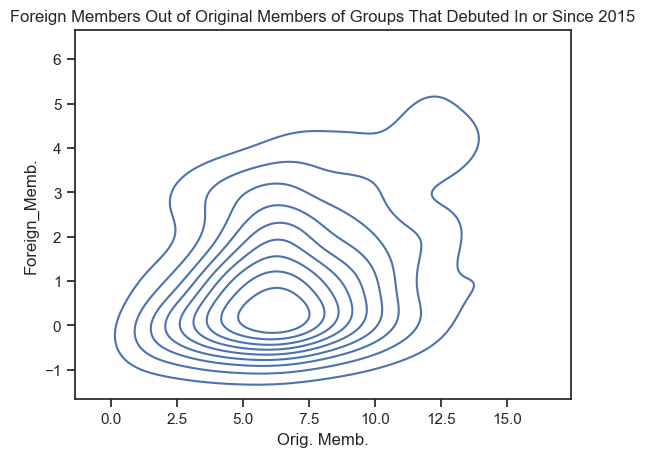

In [56]:
sns.kdeplot(data=since_2015, x='Orig. Memb.', y='Foreign_Memb.').set(title='Foreign Members Out of Original Members of Groups That Debuted In or Since 2015')

Above we can see that we would expect a representative K-pop group to have five or six members in it, none of them foreign. However, for larger groups, we would expect them to add foreign members past the fifth or sixth. This feels pretty intuitive.

Let's now consider if debutants are getting younger, as some people have begun to worry.

In [57]:
birthplace_questions[['Date of Birth', 'Debut']] = birthplace_questions[['Date of Birth', 'Debut']].apply(pd.to_datetime)

birthplace_questions['Debut_Age'] = (birthplace_questions['Debut'] - birthplace_questions['Date of Birth']) / (np.timedelta64(1, 'D'))
birthplace_questions['Debut_Age'] = birthplace_questions['Debut_Age'] // 365

,Gender,Date of Birth,Country,Second Country,Debut,Orig. Memb.,Group,Birth_Year,Debut_Year,SK_Natl,Other_Natl,Debut_Age
0,Female,2003-07-25,South Korea,NaN,2022-06-20,4,Girls' World,2003,2022,True,None,18
1,Female,1999-10-25,South Korea,NaN,2017-10-11,7,Hashtag,1999,2017,True,None,17
2,Female,1999-09-27,South Korea,NaN,2016-11-09,7,MOMOLAND,1999,2016,True,None,17
3,Female,2001-02-21,South Korea,NaN,2017-07-05,6,Favorite,2001,2017,True,None,16
4,Female,2007-04-11,South Korea,NaN,2023-11-27,7,BABYMONSTER,2007,2023,True,None,16
5,Female,2004-10-23,South Korea,NaN,2020-08-26,8,BOTOPASS,2004,2020,True,None,15
6,Female,2003-09-24,South Korea,NaN,2022-10-24,6,Queenz Eye,2003,2022,True,None,19
7,Female,1991-05-26,South Korea,NaN,2011-01-03,6,Dal Shabet,1991,2011,True,None,19
8,Female,1996-08-27,South Korea,NaN,2017-07-26,6,P.O.P,1996,2017,True,None,20
9,Female,1991-07-13,South Korea,NaN,2018-10-28,NaN,NaN,1991,2018,True,None,27


<Axes: xlabel='Debut_Age', ylabel='Debut_Year'>

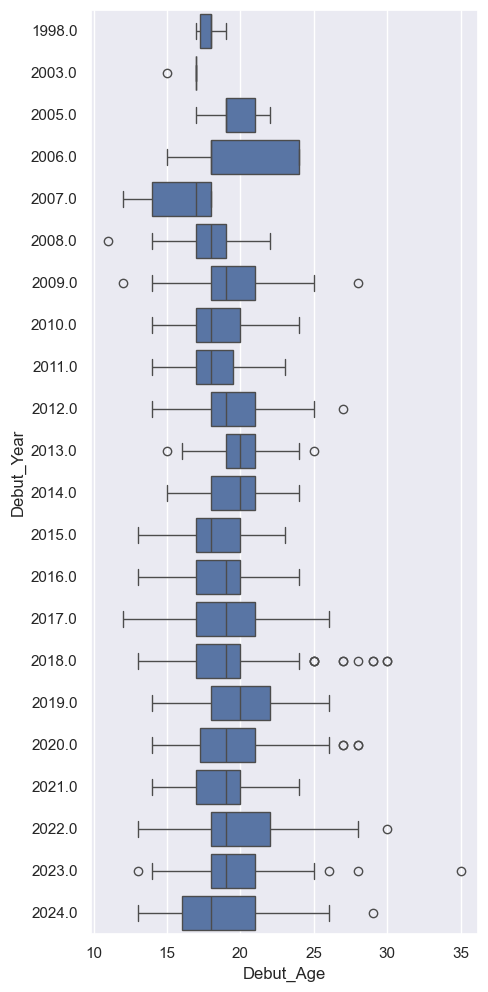

In [94]:
sns.set(rc={"figure.figsize":(5, 12)})
sns.boxplot(data=birthplace_questions, x='Debut_Age', y='Debut_Year', orient='h')

<Axes: xlabel='Debut_Age', ylabel='Debut_Year'>

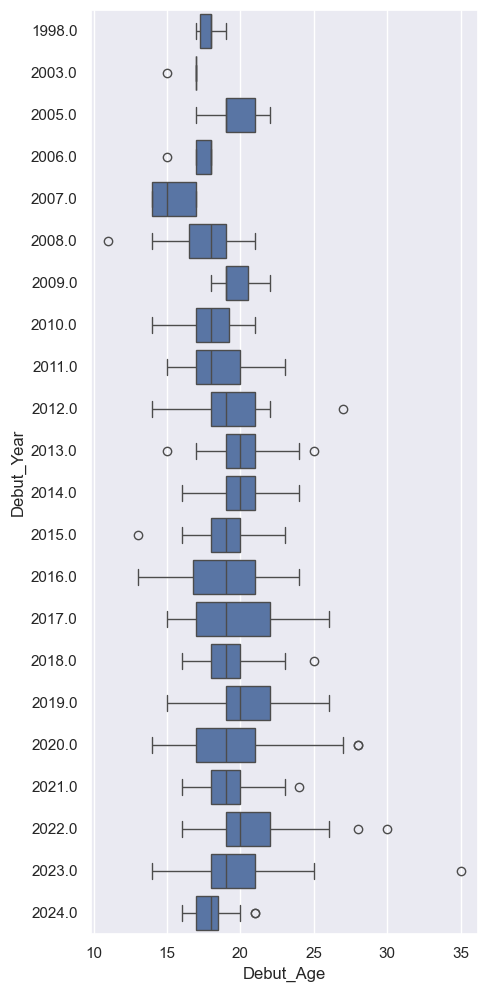

In [95]:
sns.boxplot(data=birthplace_questions.loc[birthplace_questions['Gender'] == 'Male'], x='Debut_Age', y='Debut_Year', orient='h')

<Axes: xlabel='Debut_Age', ylabel='Debut_Year'>

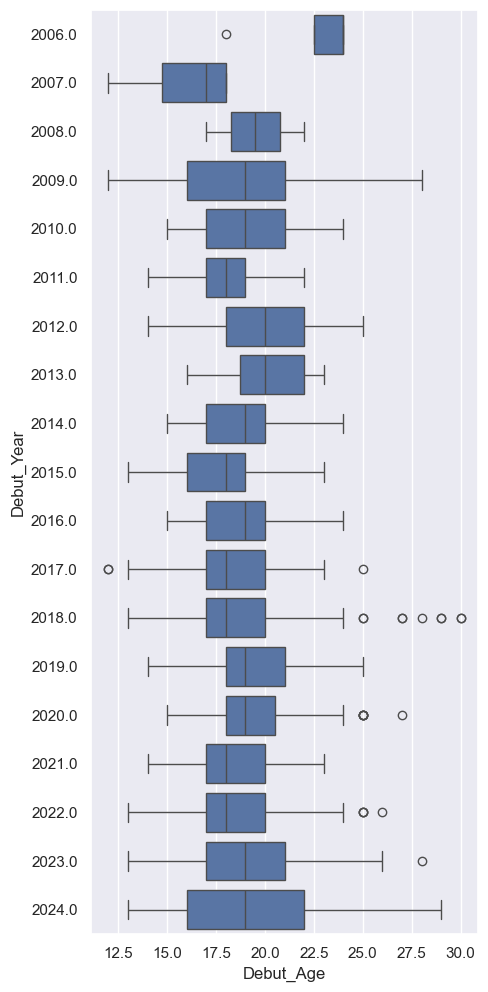

In [93]:
sns.boxplot(data=birthplace_questions.loc[birthplace_questions['Gender'] == 'Female'], x='Debut_Age', y='Debut_Year', orient='h')

While the median age of a K-pop debutant does not appear to have declined very much in the 2000s, we do see lower ages for the bottom quartile of women debuting. In 2012, the bottom quartile of female debutants were aged 14-18. By 2022, we have seen that drop to 13-16.

As we can see below, this is something that can be masked if we only consider the median ages when idols make their debuts.

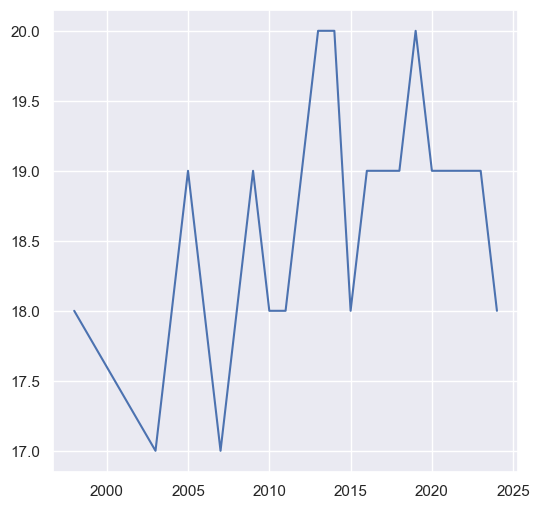

In [103]:
to_graph = birthplace_questions.groupby(['Debut_Year'])['Debut_Age'].median()
sns.set(rc={"figure.figsize":(6, 6)})
plt.plot(to_graph.index, to_graph.values)
plt.show()

Footnotes:
[1]: https://wits.worldbank.org/CountryProfile/en/Country/KOR/Year/LTST/Summary
[2]: https://www.youtube.com/watch?v=-bbfFf07WNw
[3]: https://corporate.mcdonalds.com/corpmcd/our-stories/article/bts-menu-collab-here.html